# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [ ]:
# Connecting Google Colab and mounting 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data from CSV files which is stored in google drive folder
df = pd.read_csv('/content/drive/MyDrive/PythonCourse/foodhub_order.csv')
# Checking at head (5 observations) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

* order_id : column contains order_id of the order. Order_id is unique for each order
* customer_id: contains customer_id for customer. customer_id is unioque for each indivisual customer.
* restaurant_name : contains restaurant name for wich order has been placed.
* cuisine_type : contains cuisine of the food
*	cost_of_the_order : contains cost of the order in dollar
*	day_of_the_week	: contain value if the order has been placed on weekdays or weekend
* rating : contains rating given by customer for the order
*	food_preparation_time : time taken in minutes to prepare the food	
* delivery_time : time taken in minutes to deliver the food

* order_id, customer_id, cost_of_the_order, food_preparation_time, and delivery_time are numerical variables
* restaurant_name, cuisine_type, day_of_the_week, and rating are categorical variables

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Using shape to get number of columns and rows in the dataframe
df.shape

(1898, 9)

#### Observations:
There are **1898 rows and 9 columns** in the data set

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Using function - info() to print a summary of the DataFrame
# which shows the name, datatype of columns and non-null count
# also, shows memory usage of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are total 1898 entriesand 9 columns in the Food Hub dataset

*  order_id ,customer_id , food_preparation_time, delivery_time - **int64 datatype/ numerical columns**
*  restaurant name, cuisine type, day of the week, rating - **object type/categorical.**
* cost_of_the_order - **float64**
* There is no missing data in any of the columns as numbers in Non-Null Count is same for all columns

memory usage is 133.6+ KB.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# isnull() : Detects the null values in the data set

# isnull().sum() : Counts the numbers of missing values in data set for each column
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing values in any of the columns as null count is 0 for all columns

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# describe() : Computes and displays a summary of statistics pertaining to the DataFrame columns
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:


* restaurant_name : Most favourite restaurant is Shake Shack (219 orders)
* cuisine_type:  Most favourite cuisine is American (584 orders)
* day_of_the_week : Weekend got more orders than weekdays

* order costs range from about 4 to 35 $ and average order is 16.50 dollar. Difference between the 3rd quartile and the max value of order cost is around 13 dollar. So, there migh be some outliers in the data.

* food preparation and delivery time seem to be having normal distribution. Average time of food preparation 27 minutes and average delivery time is around 24 minutes.


**For Food preparation time ,**

                - minimum time taken is 20.00 minutes
                - average time is 27.37 minutes
                - maximum time taken is 35.00 minutes 







### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# First we are checking distinct values and their unique counts for column rating
#df['rating'].value_counts()

#Then we are filtering the rating column for value 'Not given' and counting the numbers
not_rated_count = df['rating'].value_counts() ['Not given']
print( "Number of orders not rated :", not_rated_count)

Number of orders not rated : 736


#### Observations:
There are 736 orders which are not rated.

df['rating'].value_counts() ==> shows that the values for column rating are - Not given, 5,4 &3. So, we need to count 'Not given' to get the orders which are not rated.
Then, we filter the counts only for value 'Not given;



### Exploratory Data Analysis (EDA)

###Sanity Check :

###First, let's find out if the data for Food Hub has any abnormality.

In order to clean up the data, we should check if there is any  order with

*   Cost below 1 dollar
*   Food preparation time below 5 minutes
*   Delivery time below 5 minutes


In [ ]:
print("Number of order with cost below 1$ :", df[df['cost_of_the_order']<1].shape[0])
print("Number of order with food_preparation_time below 5 mins :",  df[df['food_preparation_time']<5].shape[0])
print("Number of order with delivery_time below 5 mins :", df[df['delivery_time']<5].shape[0])


Number of order with cost below 1$ : 0
Number of order with food_preparation_time below 5 mins : 0
Number of order with delivery_time below 5 mins : 0


Checking if there is any duplicate data

In [ ]:
df.duplicated().sum()

0

###Observations:
* There is no duplicate data in the dataset
* There is no value which is abnormally low or high in columns - cost_of_the_order, food_preparation_time, delivery_time

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

***Categorical Variables Analysis***

Understanding **customer_id**

In [ ]:
df['customer_id'].nunique()

1200

In [ ]:
df['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
#counting unique customer ids in the dataset
custid_count = df['customer_id'].value_counts()
#counting order numbers for unique customer ids in the dataset
cust_ordr_count = pd.DataFrame(custid_count).value_counts()


customer_id
1              784
2              267
3               83
4               33
5               19
6                6
7                4
8                1
9                1
10               1
13               1
dtype: int64

##Observations 
  - There are total 1200 customers
  - Lowest number of order is 1 and highest is 13 times by these customers
  - Majority of customers (784) had made only 1 order and 267 customers had placed only 267 orders.
  - only few customers had made frequent orders


Let's check categorical/object type variables.

Understanding **restaurant_name**

In [ ]:
df['restaurant_name'].nunique()

178

* We observe that there are 178 unique restaurants in the dataset for Food Hub

Understanding **cuisine_type**

In [ ]:
df['cuisine_type'].nunique()

14

* We observe that there are 14 types of cuisines in dataset for Food Hub

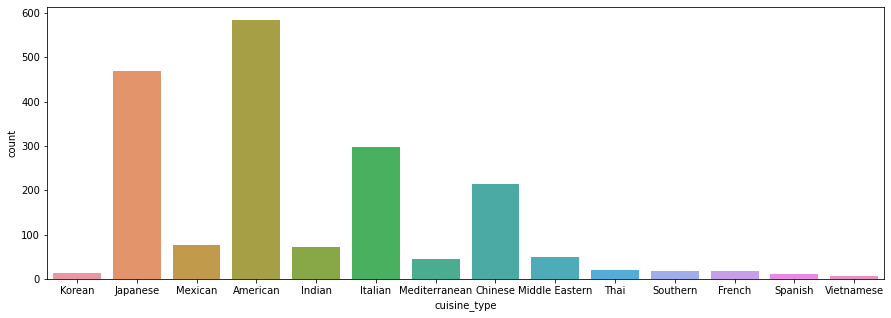

In [ ]:
plt.figure(figsize = (15,5))
## Countplot for cuisine type
sns.countplot(data = df, x = 'cuisine_type') ;


Observations:


*   Among 14 types of cuisine, American is most preffered one
*   Second popular cuisine is Japanese, followed by Italian



Understanding **day_of_the_week**

In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

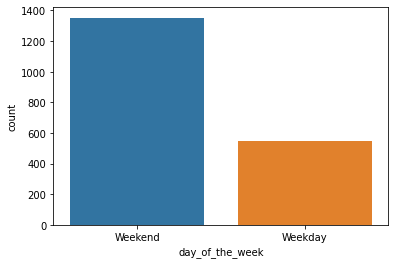

In [ ]:
## Countplot for cuisine type
sns.countplot(data = df, x = 'day_of_the_week') ;


Observations:
 *  Days of the week has two categories - Weekend and weekdays
 *  We can see that order are qiute high on weekend than weekdays 

Understanding **rating**

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

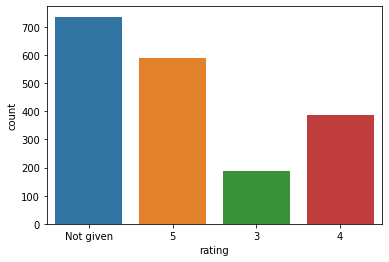

In [ ]:
#plt.figure(figsize = (15,5))
## Countplot for rating
sns.countplot(data = df, x = 'rating') ;


Observation 
* we observe that for most of the orders rating is 'Not given'
* Other than 'Not given', 5 is the most common rating.
* there is no order given rating 3

***Numerical Variables Analysis***

Understanding **cost_of_the_order**

In [ ]:
df['cost_of_the_order'].nunique()

312

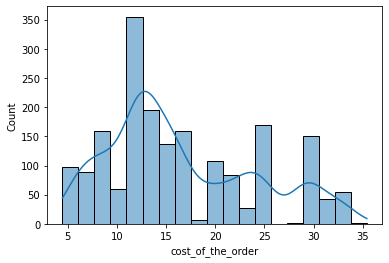

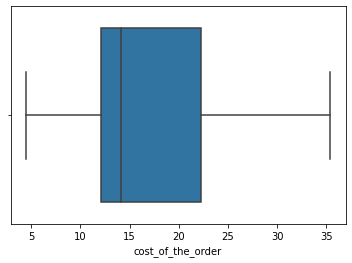

In [ ]:
## Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order', kde = True)
plt.show()
## Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show() 

Observations:
* Data for cost_of_the_order is right skewed.Histogram has long right tail and boxplot has long right whishker. 
* 50% of the orders have costs below 14 dollars
* There is no outliers

Understanding **food_preparation_time**

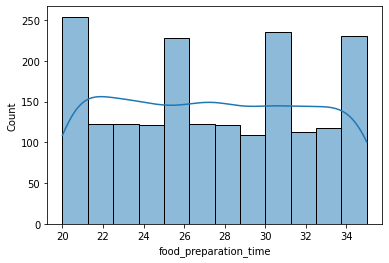

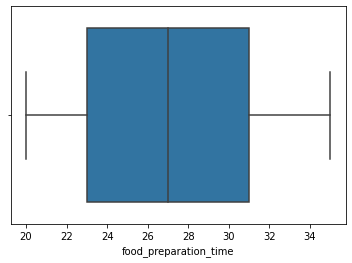

In [ ]:
## Histogram for the food_preparation_time
sns.histplot(data=df,x='food_preparation_time', kde = True) 
plt.show()
## Boxplot for the cost of order
sns.boxplot(data=df,x='food_preparation_time' ) 
plt.show() 

Observations:
* Avg food prepration time is 27 minutes.Minimum time is 20 minutes and maximum is 35 minutes
* Food preparation time distribution is close to normal
* there is no outliers

Understanding **delivery_time**

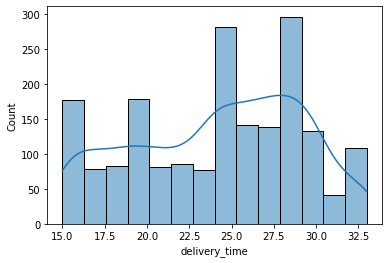

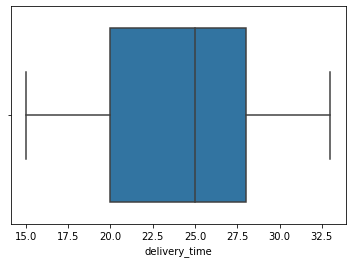

In [ ]:
## Histogram for the food_preparation_time
sns.histplot(data=df,x='delivery_time', kde = True) 
plt.show()
## Boxplot for the cost of order
sns.boxplot(data=df,x='delivery_time' ) 
plt.show()

Observation : 
 * Distribution is slightly left skewed
 * There is no outliers
 * 50% of the delivery time is under 25 minutes. Minimum delivery time is 15 minutes, max is 33 minutes with avg 25 minutes


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants with highest number of orders
# counting number of orders groupby restaurants and sort the values in descending orders.
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
first counting the total number of orders griupby restaurants by counting order_ids.  Then sorting the values in descending orders and getting top 5 values by using method head().

Top 5 restaurants in terms of the number of orders are as below :

1. Shake Shack   
2. The Meatball Shop  
3. Blue Ribbon Sushi        
4. Blue Ribbon Fried Chicken  
5. Parm           


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# First filtering the data set for weekend, then counting the unique values for each cuisine_type
df_cuisine = df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts()
# Using max() function gets the highest value
print( "The most popular cuisine on weekends is :",df_cuisine.max())


The most popular cuisine on weekends is : 415


#### Observations:
Most popular cuisine on weekend is American (total 415 orders)


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculating number of orders which cost more than 20 dollars
count_above_cost20  = df[df['cost_of_the_order']>20].shape[0]

#Getting total number of orders
count_all = df.shape[0]

print('The number of total orders that cost above 20 dollars is:', count_above_cost20)
print('The number of total orders is:', count_all )

# Calculating percentage of orders costing more than 20$ in the dataset
perc_above_cost20 = (count_above_cost20/count_all)*100

print("Percentage of orders above 20 dollars:", round(perc_above_cost20, 2), '%')


The number of total orders that cost above 20 dollars is: 555
The number of total orders is: 1898
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
Total orders that cost above 20 dollars is 555 which is 29.24% of total number orders

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Checking mean for delivery_time
del_time_mean = df['delivery_time'].mean()
print('The mean deilvery time is :', round(del_time_mean, 2), 'minutes')

The mean deilvery time is : 24.16 minutes


#### Observations:
Mean order delivery time is : 24.16 minutes. mean() functions returns avarage value accross a specified axis.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Counting orders group by customer_id
df1 = df.groupby(['customer_id'])["order_id"].count()

#Sorting number of orders for a customer in descending order and getting top 5 result
df2 = df1.sort_values(ascending=False).reset_index().head()

#printing top 5 results
print('Top 5 most frequent customers')
print('--'*15)
print(df2)


Top 5 most frequent customers
------------------------------
   customer_id  order_id
0        52832        13
1        47440        10
2        83287         9
3       250494         8
4        65009         7


#### Observations:
* First we are groupby the dataset by customer_id and counting the number of orders
* Sorting the result in desecending order by using sort()
* head() function is showing top 5 results.

As per the analysis given above following customers are eligible to get 20% discount voucher - 
52832   ,
47440,
83287,
250494 ,
65009


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Analysis of relationship between cost of the order and cuisine type

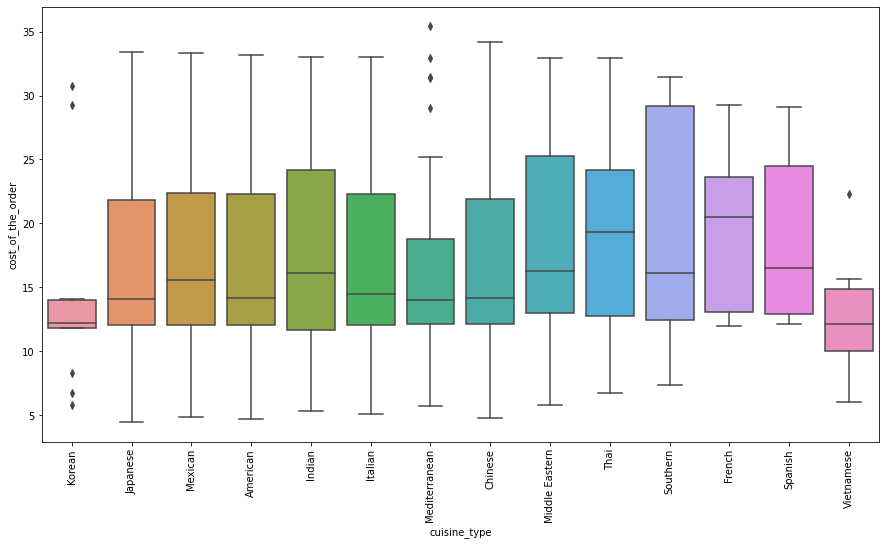

In [ ]:
# Analysis of relationship between cost of the order and cuisine type
plt.figure(figsize=(15,8))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 90)
plt.show()


##Observations:
* It can be observed that almost all the cuisines are under 35$.
* Korean, Mediterrarean and Vietnamese have few outliers
* French has the highest value of average cost of 20 dollar

Analysis of relationship between restaurant & cost_of_the_order




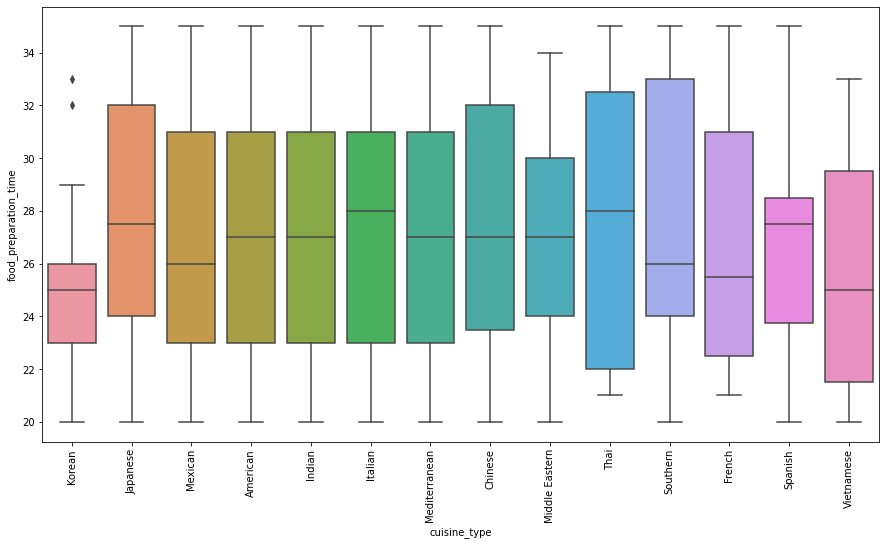

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 90)
plt.show()

##Observations:
* It can be observed that orders for all cuisines are prepared under 33 minutes
* Vietnamese has a outliers
* Thai has the highest value of average preparation time

Analysis of relationship between day & delivery time

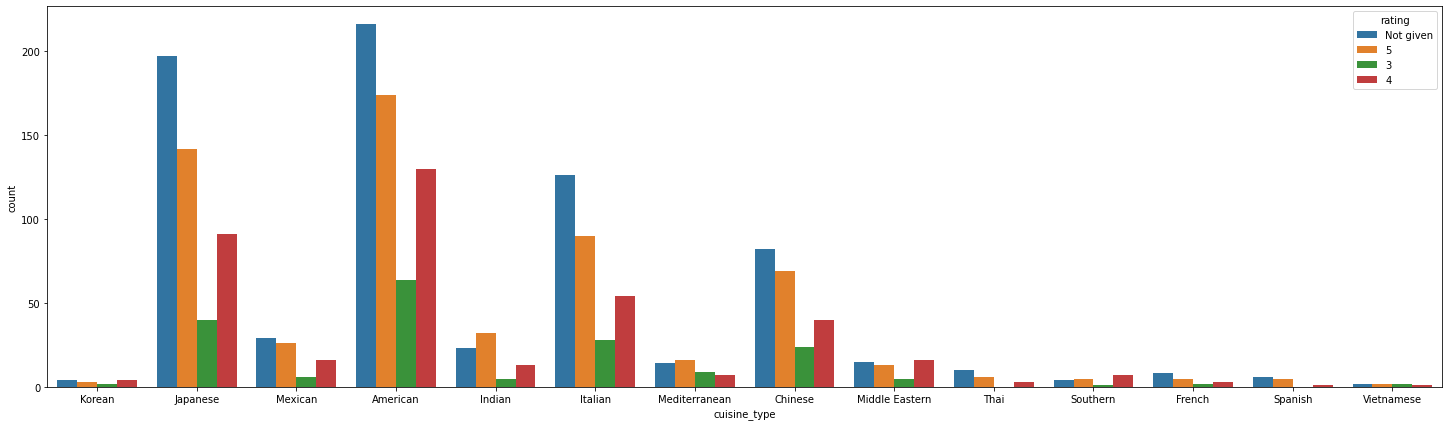

In [ ]:
plt.figure(figsize = (25,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating');

Observations 
 - American, Japanese, Italian, and Chinese are the top 4 highly rated.

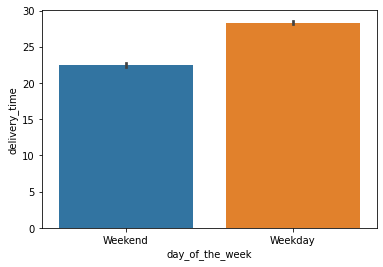

In [ ]:
sns.barplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.show()

We observe that delivery time is higher on weekdays than weekend

Analysis of relationship between day & food preparation time

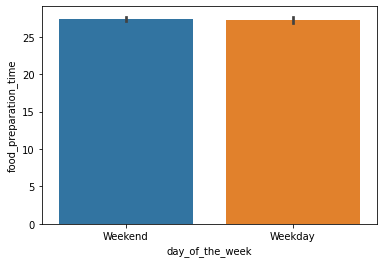

In [ ]:
sns.barplot(x = "day_of_the_week", y = "food_preparation_time", data = df)
plt.show()

There is no difference in food preparation time on weekdays and weekend.

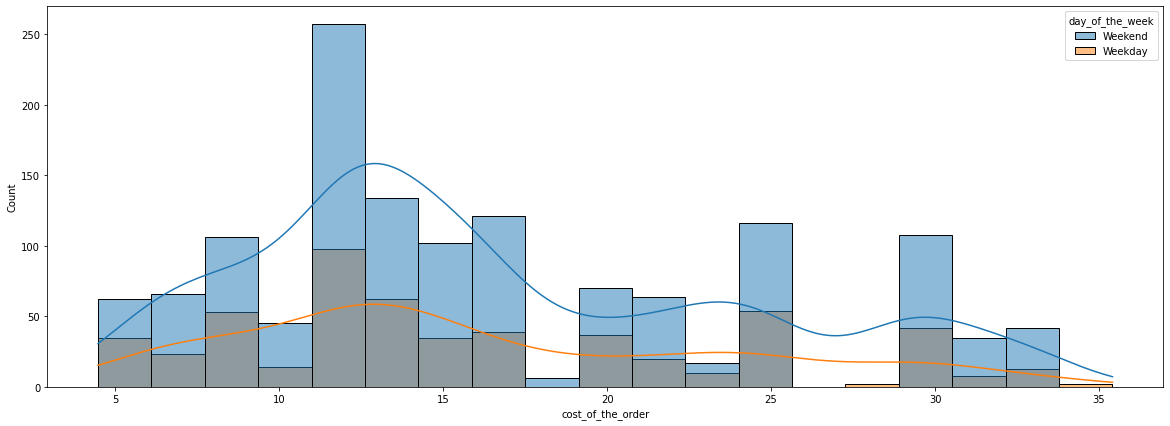

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', kde = True)

More orders are being placed on weekend over weekdays for all cost ranges

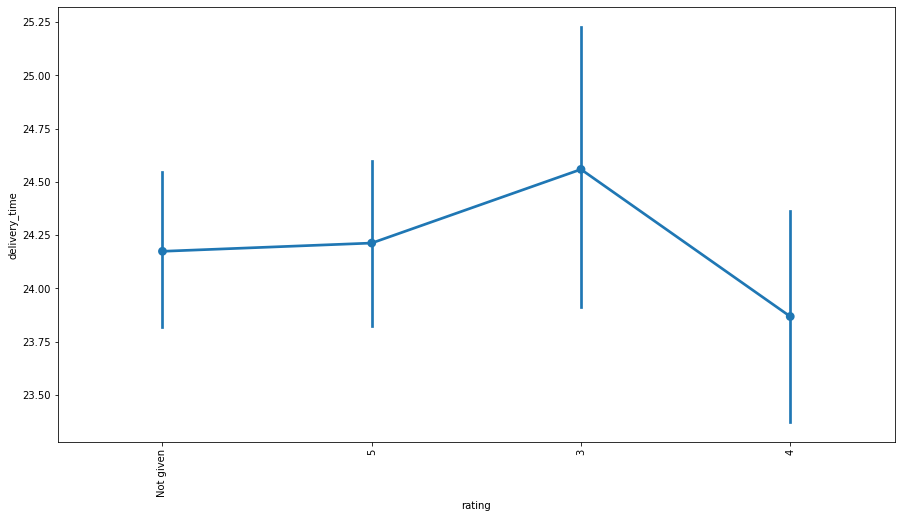

In [ ]:
plt.figure(figsize=(15,8)) 
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.xticks(rotation=90);

Here we observe that delivery time is more for rating 3 whereas user gave rating 4 for less delivery time

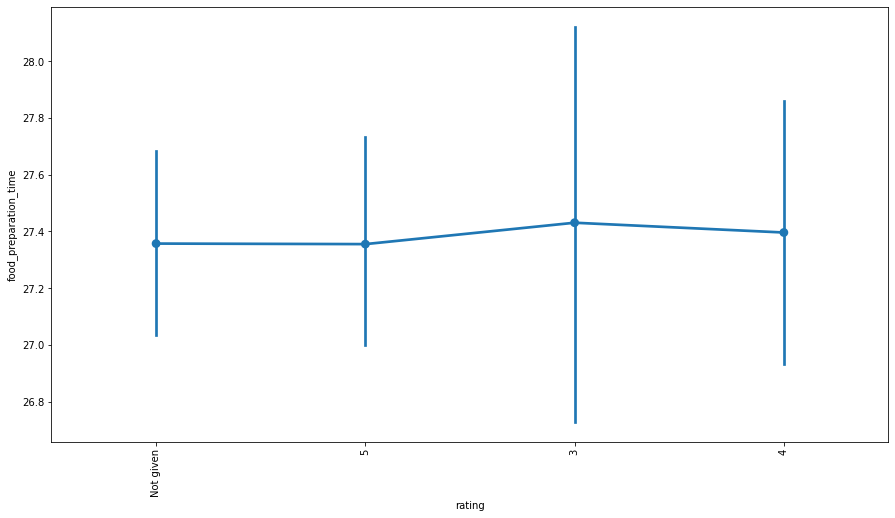

In [ ]:
plt.figure(figsize=(15,8)) 
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.xticks(rotation=90);

Here , we observe that food preparation time is high for rating 3 whereas for lower food prepration time user has given rating 5 or 'Not given'

In [ ]:
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.00,-0.01,0.02,-0.01,0.01
customer_id,-0.01,1.00,-0.00,-0.03,-0.01
cost_of_the_order,0.02,-0.00,1.00,0.04,-0.03
food_preparation_time,-0.01,-0.03,0.04,1.00,0.01
delivery_time,0.01,-0.01,-0.03,0.01,1.00


In [ ]:
df.cov()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,300358.50,-869897.18,86.83,-17.84,26.41
customer_id,-869897.18,12927266981.03,-1124.48,-15974.76,-5588.93
cost_of_the_order,86.83,-1124.48,56.01,1.44,-1.11
food_preparation_time,-17.84,-15974.76,1.44,21.46,0.26
delivery_time,26.41,-5588.93,-1.11,0.26,24.73


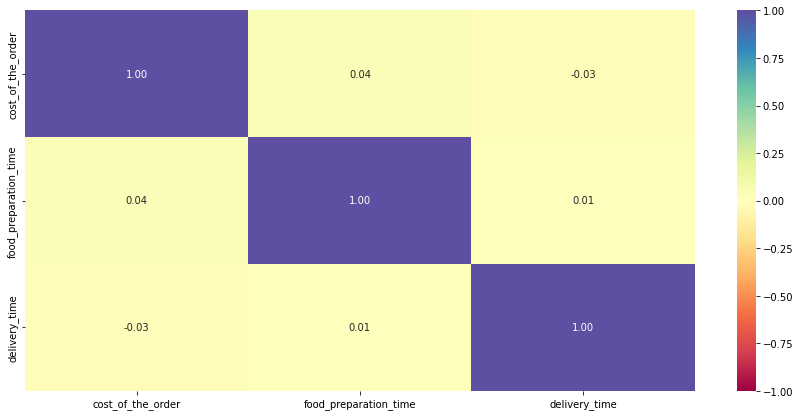

In [ ]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

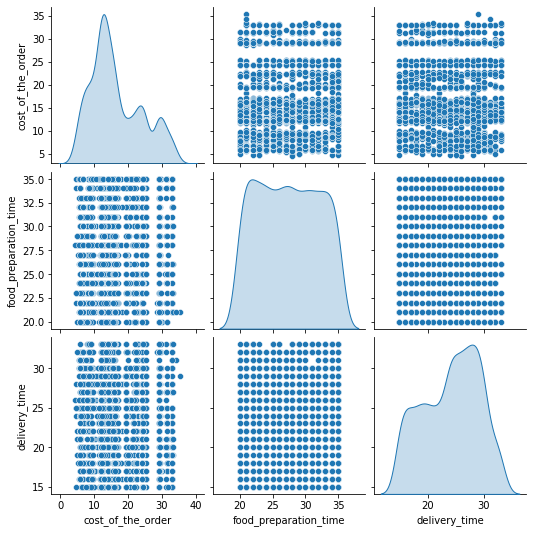

In [ ]:
sns.pairplot(data=df[col_list], diag_kind="kde")
plt.show()

No linear relationship can be identified

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Removing Rating which are Not given
df_ratings = df[df['rating'] != 'Not given'].copy()

# Now dataframe, df_ratings has ratings as 1,2,3,4,5
# Changing data type of rating column from object to integer
df_ratings['rating'] = df_ratings['rating'].astype('int')  

# Creating a dataframe group by the restaurant names with their rating counts
# fileting count values greater than 50 by using lamda
df_rating_50count = df_ratings.groupby(['restaurant_name'])['rating'].count()[lambda x: x>50].sort_values(ascending = False).reset_index() 

#Renaming the column name as rating_counts 
df_rating_50count.rename(columns = {'rating':'rating_counts'}, inplace = True)
#print(df_rating_count)

# Creating a dataframe group by the restaurant names with their average (mean) rating 
# fileting mean values greater than 4 by using lamda
df_rating4_mean = df_ratings.groupby(['restaurant_name'])['rating'].mean()[lambda x: x>4].sort_values(ascending = False).reset_index()
#Renaming the column name as rating counts
df_rating4_mean.rename(columns = {'rating':'avg_rating'}, inplace = True)
#print(df_rating_mean)

print('The restaurants fulfilling the criteria to get the promotional offer are : ')
print('----'*20)

# Merging 2 dataframes - df_rating4_mean (dataframe with mean rating greater than 4) and 
# df_rating_50count(dataframe with rating counts more than 50) using keys from the right dataframe
# Column/index names to join on in the left DataFrame is restaurant_name
# Column/index names to join on in the right DataFrame is restaurant_name

df_rating4_mean.merge(df_rating_50count, how = 'right', indicator=False, left_on='restaurant_name', 
                                                            right_on='restaurant_name').sort_values(by='rating_counts',ascending = False)


The restaurants fulfilling the criteria to get the promotional offer are : 
--------------------------------------------------------------------------------


,restaurant_name,avg_rating,rating_counts
0,Shake Shack,4.28,133
1,The Meatball Shop,4.51,84
2,Blue Ribbon Sushi,4.22,73
3,Blue Ribbon Fried Chicken,4.33,64


#### Observations:

1.   First we removed the value - 'Not given' from the column rating as this value can't be considered for the given scenario and copied to a new dataframe
2.   We observed that data type of the column rating is object , so it has been changed to integer.
3.   Created a dataframe where restaurants have rating count of more than 50
4.   Created second dataframe where restaurants have average rating  more than 4
5.   Merged two dataframed based on keys from the first dataframe (restaurants rating count>50)

The result shows that there are 4 restaurants which has average rating greater than 4 and rating counts more than 50




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculating the revenue using below function
def calculate_rev(cost):
    
    # For order>20$, charges 25%
    if cost > 20:
        return cost*0.25
    
    # For order>5$, charges 15%    
    elif cost > 5:
        return cost*0.15
    # For all other orders <=5$
    else:
        return 0

# Calculating revenue and storing the value in new column - revenue
df['revenue'] = df['cost_of_the_order'].apply(calculate_rev)

# Calculating total revenues
net_revenue = df['revenue'].sum()
print('Net revenue generated by company across all orders is :',net_revenue)


Net revenue generated by company across all orders is : 6166.303


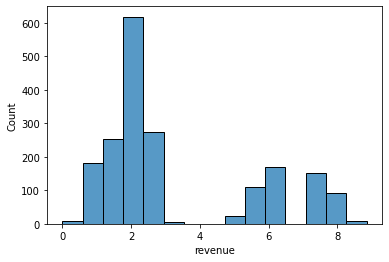

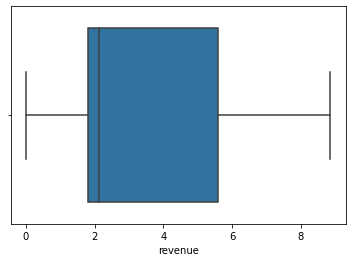

In [ ]:
sns.histplot(data=df,x='revenue') ;
plt.show()
sns.boxplot(data=df,x='revenue')
plt.show()

#### Observations:


*   Net revenue generated by company across all orders is : 6166.30 USD
*   Data for revenue is a bit right skewed and there is no outlier




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Getting total delivery time and adding a new column total_del_time to the dataframe to store the total delivery time
df['total_del_time'] = df['food_preparation_time'] + df['delivery_time']
#df.head()

# Gettingvalues with  total_del_time > 60 minutes
df_del_time60 = df[df['total_del_time']>60].copy()
#df_del_time60

tot_ord_count = df.shape[0]
ord_count_60m = df_del_time60.shape[0]

perc_ord_60m = ord_count_60m/tot_ord_count *100
print('The percentage of orders take more than 60 minutes to get delivered :', round(perc_ord_60m, 2))



The percentage of orders take more than 60 minutes to get delivered : 10.54


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Getting mean delivery_time for Weekday
del_time_mean_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The mean delivery time during weekdays is :', round(del_time_mean_weekday, 2))

# Getting mean delivery_time for Weekend
del_time_mean_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean delivery time during weekend is :', round(del_time_mean_weekend, 2))

The mean delivery time during weekdays is : 28.34
The mean delivery time during weekend is : 22.47


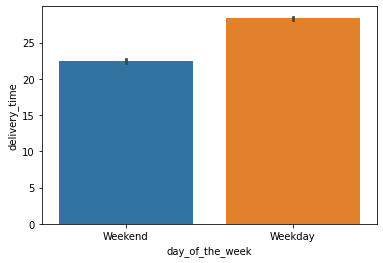

In [ ]:
sns.barplot(data= df, y='delivery_time', x='day_of_the_week');


#### Observations: 
 - Average delivery time is higher on weekdays than weekend


In [ ]:
df.groupby(['day_of_the_week'])['order_id'].count()

day_of_the_week
Weekday     547
Weekend    1351
Name: order_id, dtype: int64

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The Dataset extracted from the Food Hub has been analysed to understand customer demand and enhance customer experience.With the help of descriptive analysis and visualisations, some insights have been drawn as below:
*  Most of the customers (784 out of 1200) have placed only one order that means **65% customers have placed only one order**. 
   22% customers have places 2 orders.

   Only 2 customers out 1200 customers have placed more than 10 orders   
        customer_id  order_count
        52832           13
        47440           10

* **American , Japanese, Italian** - are top 3 popular and highly rated cuisines

* Most of the orders are placed on **weekends**
      Weekday  -   547
      Weekend  -  1351

* Customers gave more **good rating (4) for quicker delivery**

* Average delivery time is high on **weekdays** 
      weekdays: 28.34
      weekend : 22.47
      
* Only **3 restaurants** have more than 100 orders :
      Restaurant               Order counts
      Shake Shack                  219
      The Meatball Shop            132
      Blue Ribbon Sushi            119






### Recommendations:

  1. Need to understand the customer experience for all customers who have ordered only once or twice. If Food Hub can identify and remove the root-cause, these customers might order more often. This can be done by offering some discount for feedback.

  2. There some restaurants and cusines which are low on order counts or order amount. More advertisements, offers or notifications on special events for these cuisine type or restautants could be helpful to attrack customers attention. Also, requesting feedback on different attributes like Food/packaging quality, delivery time, value for money could be helpful to understand the area of improvements

  3. Foodhub should consider to include more restaurants of top rated and popular restaurants and cuisines. This will increase number of customers of Food Hub.

  4. Average delivery time  on weekdays is lower than weekend even though demand is significantly low on weekdays. Foodhub should identify the root causes like lack of delivery person or high traffic or longer distance.
  Adding delivery distance could be helpful for better understanding of delivery time. All these can enhance user delivery experince.

  5. For majority of the orders, rating were not given. If Food Hub can offer some icentives or discounts to customers with request for proving rating , this can majorly change the analysis of the demands for given dataset






---